<a href="https://colab.research.google.com/github/Nyakatodianah/Cirrheosis-prediction-in-patients/blob/main/Cirrhosis_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [137]:
import pandas as pd
!pip install warnings
import warnings
warnings.filterwarnings('ignore')

ERROR: Could not find a version that satisfies the requirement warnings (from versions: none)
ERROR: No matching distribution found for warnings


### **Data Loading**

In [138]:
df = pd.read_csv('/content/cirrhosis.xlsx - cirrhosis.xls (1).csv')
df.head()


,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


### **Data Exploration**

In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             418 non-null    int64  
 1   N_Days         418 non-null    int64  
 2   Status         418 non-null    object 
 3   Drug           312 non-null    object 
 4   Age            418 non-null    int64  
 5   Sex            418 non-null    object 
 6   Ascites        312 non-null    object 
 7   Hepatomegaly   312 non-null    object 
 8   Spiders        312 non-null    object 
 9   Edema          418 non-null    object 
 10  Bilirubin      418 non-null    float64
 11  Cholesterol    284 non-null    float64
 12  Albumin        418 non-null    float64
 13  Copper         310 non-null    float64
 14  Alk_Phos       312 non-null    float64
 15  SGOT           312 non-null    float64
 16  Tryglicerides  282 non-null    float64
 17  Platelets      407 non-null    float64
 18  Prothrombi

In [140]:
#drop columns that are not so important in this analysis
df = df.drop(columns = ['ID','N_Days','Status','Drug'])
df

,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,24472,F,NaN,NaN,NaN,N,1.2,NaN,2.96,NaN,NaN,NaN,NaN,174.0,10.9,3.0
414,14245,F,NaN,NaN,NaN,N,0.9,NaN,3.83,NaN,NaN,NaN,NaN,180.0,11.2,4.0
415,20819,F,NaN,NaN,NaN,N,1.6,NaN,3.42,NaN,NaN,NaN,NaN,143.0,9.9,3.0
416,21185,F,NaN,NaN,NaN,N,0.8,NaN,3.75,NaN,NaN,NaN,NaN,269.0,10.4,3.0


In [141]:
#checking for missing values
df.isnull().sum()

Age                0
Sex                0
Ascites          106
Hepatomegaly     106
Spiders          106
Edema              0
Bilirubin          0
Cholesterol      134
Albumin            0
Copper           108
Alk_Phos         106
SGOT             106
Tryglicerides    136
Platelets         11
Prothrombin        2
Stage              6
dtype: int64

In [142]:
#handle missing values
from sklearn.impute import SimpleImputer
# Identify categorical and numerical columns
cat_columns = df.select_dtypes(include='object').columns
num_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Create imputers for numerical and categorical columns
num_imputer = SimpleImputer(strategy='median')
cat_imputer = SimpleImputer(strategy='most_frequent')

# Apply the imputers
df[num_columns] = num_imputer.fit_transform(df[num_columns])
df[cat_columns] = cat_imputer.fit_transform(df[cat_columns])

df.isnull().sum()

Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
dtype: int64

In [143]:
#dropping duplicates
df.drop_duplicates(inplace=True)
df

,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,21464.0,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,20617.0,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,25594.0,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,19994.0,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,13918.0,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,24472.0,F,N,Y,N,N,1.2,309.5,2.96,73.0,1259.0,114.70,108.0,174.0,10.9,3.0
414,14245.0,F,N,Y,N,N,0.9,309.5,3.83,73.0,1259.0,114.70,108.0,180.0,11.2,4.0
415,20819.0,F,N,Y,N,N,1.6,309.5,3.42,73.0,1259.0,114.70,108.0,143.0,9.9,3.0
416,21185.0,F,N,Y,N,N,0.8,309.5,3.75,73.0,1259.0,114.70,108.0,269.0,10.4,3.0


In [144]:
#dropping NaNs
df.dropna()

,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,21464.0,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,20617.0,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,25594.0,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,19994.0,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,13918.0,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,24472.0,F,N,Y,N,N,1.2,309.5,2.96,73.0,1259.0,114.70,108.0,174.0,10.9,3.0
414,14245.0,F,N,Y,N,N,0.9,309.5,3.83,73.0,1259.0,114.70,108.0,180.0,11.2,4.0
415,20819.0,F,N,Y,N,N,1.6,309.5,3.42,73.0,1259.0,114.70,108.0,143.0,9.9,3.0
416,21185.0,F,N,Y,N,N,0.8,309.5,3.75,73.0,1259.0,114.70,108.0,269.0,10.4,3.0


### **Creating exploratory visualizations to understand your data and search for trends.**

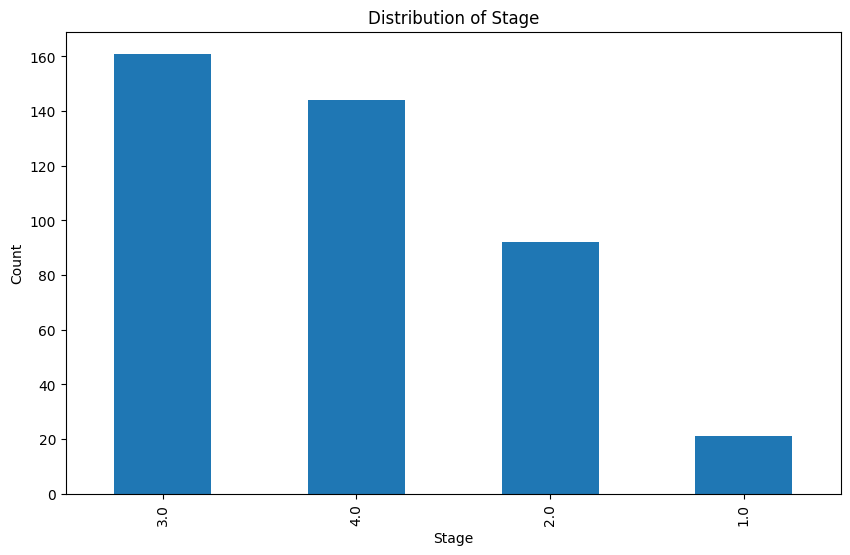

In [145]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
df['Stage'].value_counts().plot(kind='bar')
plt.xlabel('Stage')
plt.ylabel('Count')
plt.title('Distribution of Stage')
plt.show()


<Figure size 800x600 with 0 Axes>

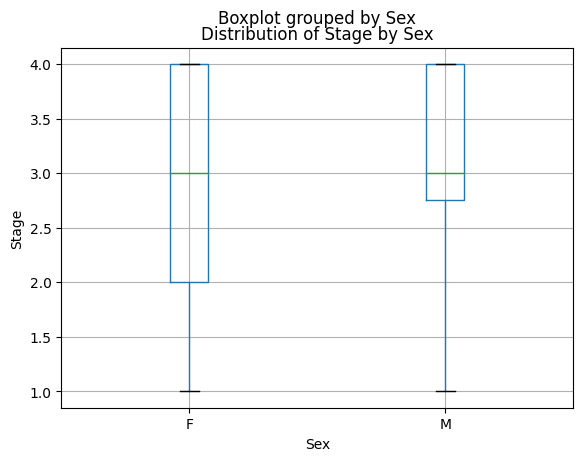

In [146]:
import matplotlib.pyplot as plt
# A boxplot to visualize the distribution of 'Stage' across different categories of 'Sex'
plt.figure(figsize=(8, 6))
df.boxplot(column='Stage', by='Sex')
plt.xlabel('Sex')
plt.ylabel('Stage')
plt.title('Distribution of Stage by Sex')
plt.show()


### **Model Building**

In [147]:
#impute categorical and numerical  columns by standard scaling
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder

encoder = OneHotEncoder(sparse=False)
scaler = StandardScaler()
# Identify categorical and numerical columns
cat_columns = df.select_dtypes(include='object').columns
num_columns = df.select_dtypes(include=['int64', 'float64']).columns

cat_columns_encoded = encoder.fit_transform(df[cat_columns])
num_columns_scaled = scaler.fit_transform(df[num_columns])

cat_columns_encoded_df = pd.DataFrame(cat_columns_encoded, columns=encoder.get_feature_names_out(cat_columns))
num_columns_scaled_df = pd.DataFrame(num_columns_scaled, columns=num_columns)

df_encoded = pd.concat([cat_columns_encoded_df, num_columns_scaled_df], axis=1)
df_encoded

,Sex_F,Sex_M,Ascites_N,Ascites_Y,Hepatomegaly_N,Hepatomegaly_Y,Spiders_N,Spiders_Y,Edema_N,Edema_S,...,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,2.562152,-0.462810,-2.114296,0.869937,-0.043326,0.354624,0.976773,-0.689990,1.442407,1.115988
1,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,-0.481759,-0.250257,1.513818,-0.501099,2.987731,-0.143679,-0.579186,-0.370101,-0.128736,-0.027353
2,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,-0.413611,-0.903470,-0.041088,1.595779,-0.685119,-0.498998,-1.190456,-1.092430,1.246014,1.115988
3,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,-0.322748,-0.550942,-2.255651,-0.366683,2.308028,-1.222487,-0.505093,-0.762223,-0.423325,1.115988
4,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.040704,-0.369494,0.076708,0.695197,-0.602359,-0.151226,-0.875559,-1.247215,0.165853,-0.027353
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,-0.459043,-0.211375,-1.266165,-0.245710,-0.288404,-0.119611,-0.208720,-0.855094,0.165853,-0.027353
414,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,-0.527190,-0.211375,0.783484,-0.245710,-0.288404,-0.119611,-0.208720,-0.793180,0.460443,1.115988
415,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,-0.368180,-0.211375,-0.182443,-0.245710,-0.288404,-0.119611,-0.208720,-1.174982,-0.816111,-0.027353
416,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,-0.549906,-0.211375,0.595010,-0.245710,-0.288404,-0.119611,-0.208720,0.125210,-0.325129,-0.027353


In [148]:
#train_test split
from sklearn.model_selection import train_test_split
X = df_encoded.drop('Stage', axis=1)
y = df_encoded['Stage']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(334, 21)
(84, 21)
(334,)
(84,)


In [149]:
# Model building
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
Lr = LinearRegression()
Lr.fit(X_train, y_train)
y_pred = Lr.predict(X_test)
print(y_pred)

[ 0.296875    0.55859375  0.41796875  0.921875    1.01171875  0.31640625
 -0.80859375  0.63671875  0.234375    0.0234375   0.6640625   0.515625
 -0.4765625  -0.015625    0.5078125  -0.35546875 -0.1171875   0.63671875
  0.375       0.015625    0.1484375  -0.20703125 -0.15625     0.4296875
 -0.09765625 -0.53125     0.15234375  0.88671875 -0.17578125 -0.4375
 -0.39453125 -0.11328125 -0.0625      0.84765625  0.859375    0.1015625
  0.24609375 -0.86328125  0.015625    1.02734375 -0.1328125  -0.51953125
 -1.         -0.421875    0.58984375  0.0625      0.33203125 -0.66796875
  0.19921875  0.3828125   1.3046875   0.34375    -0.296875    0.78125
 -0.31640625 -0.2890625   1.05859375  0.19140625 -0.01953125 -0.12109375
  0.1328125   0.28125    -0.8515625  -0.4921875   0.39453125 -0.2734375
 -0.484375    0.51171875  0.4140625  -0.09765625  0.36328125 -0.73046875
 -0.08984375  1.80859375 -0.66015625 -0.2890625   0.33203125  0.54296875
  0.39453125 -0.7265625  -1.140625   -0.8046875   1.65625    -0

In [150]:
#model evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 0.7261470555712871
R-squared: 0.1959974502806463


### **Extracting and visualizing the top 10 features using permutation importance**

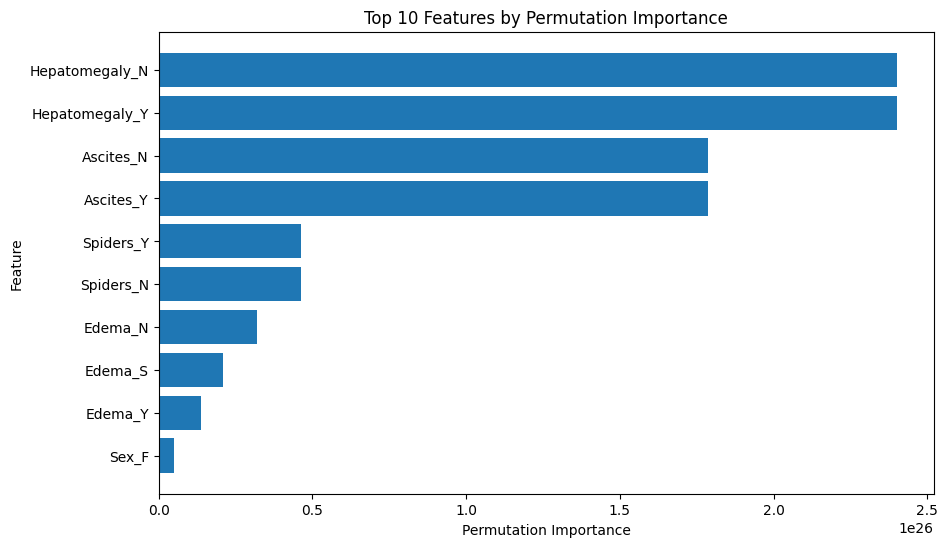

In [151]:
from sklearn.inspection import permutation_importance
# Calculate permutation importance
perm_importance = permutation_importance(Lr, X_test, y_test, n_repeats=10, random_state=42)

# Get feature importances and names
feature_importance = perm_importance.importances_mean
feature_names = X_test.columns

# Sort feature importances in descending order and select top 10
top_indices = feature_importance.argsort()[::-1][:10]
top_features = feature_names[top_indices]
top_importance = feature_importance[top_indices]

# Visualize top 10 features
plt.figure(figsize=(10, 6))
plt.barh(top_features, top_importance)
plt.xlabel('Permutation Importance')
plt.ylabel('Feature')
plt.title('Top 10 Features by Permutation Importance')
plt.gca().invert_yaxis()
plt.show()


### **Do these features make sense based on the business case?**

Hepatomegaly N and Y,Ascites N and Y,Spiders Y and N,Edema N,S and Y,and sex_F  have a great influence on this business case

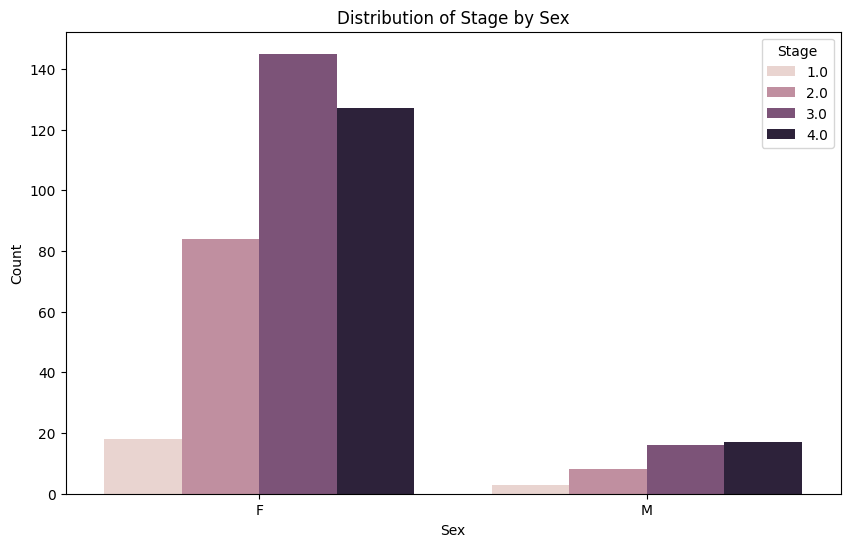

In [152]:
#Select 2 out of the top 10 features from your permutation importances and produce explanatory visualizations showing the relationship between the feature and the target.
#feature 1 Hepamatomegaly and Stage
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Sex', hue='Stage')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Distribution of Stage by Sex')
plt.show()


From the visualisation,Females have a high level in each stage compared to the Males

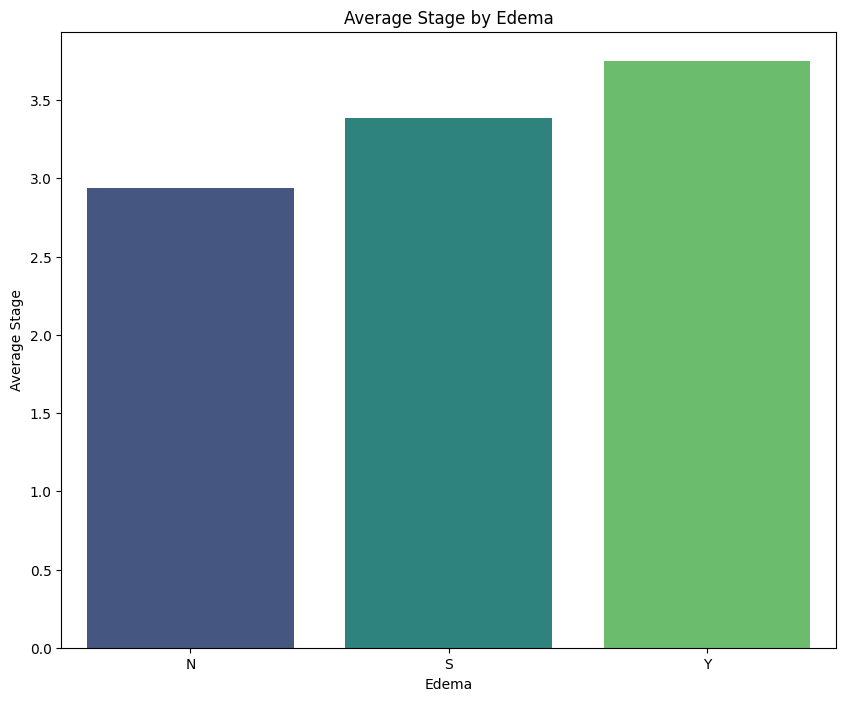

In [153]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the average stage for each category of edema
avg_stage_by_edema = df.groupby('Edema')['Stage'].mean().reset_index()

# Create a bar plot to visualize the average stage for each category of edema
plt.figure(figsize=(10, 8))
sns.barplot(data=avg_stage_by_edema, x='Edema', y='Stage', palette='viridis')
plt.xlabel('Edema')
plt.ylabel('Average Stage')
plt.title('Average Stage by Edema')
plt.show()


Firstly,N,S and Y represent the following:

N (no edema and no diuretic therapy for edema)

S (edema present without diuretics, or edema resolved by diuretics)

or Y (edema despite diuretic therapy)


From the visualisation above Y, has the highest stage level of Cirrhosis compared to N and S

### **PCA**

In [154]:
#Apply PCA to get 3 principal components for the data. Concatenate/combine these PC’s with the original features (X_train, X_test data).
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
print(X_train_pca.shape)
print(X_test_pca.shape)


(334, 3)
(84, 3)


### **Clustering**

In [155]:
#Apply clustering, select the appropriate number of clusters, and use the clustering object to get predicted cluster labels for the training and test data. Concatenate/combine these clusters with the original features.
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_train_pca)


KMeans(n_clusters=3, random_state=42)

In [156]:
# Remember to only fit the PCA on the training data and use pca.transform(X_test) to get the PCs for the testing data.
pca.fit(X_train)
X_test_pca = pca.transform(X_test)
X_test_pca

array([[-7.23891097e-01,  1.20297748e+00,  3.24184537e-01],
       [ 1.43980679e+00,  2.36847158e+00, -1.54664105e+00],
       [-4.79564638e-01,  1.51404197e+00,  6.92293898e-01],
       [ 1.87220233e+00,  1.00764198e+00,  1.19902868e+00],
       [ 1.28531030e+00,  4.27790628e+00,  2.88103782e-01],
       [ 1.64633772e+00, -4.63147629e-01, -6.71124934e-01],
       [-2.22127591e+00, -2.60788230e-02, -9.46568606e-01],
       [-5.35065671e-01,  2.49229333e+00, -2.02402897e-01],
       [-2.04580904e-01,  9.22170445e-01,  4.34132213e-01],
       [-8.22756691e-01,  1.27386580e-01,  3.89596732e-01],
       [ 2.05450445e+00,  2.02052955e+00,  1.23852837e+00],
       [-3.04958425e-01,  1.89941513e+00,  8.24604399e-01],
       [-5.86828053e-01, -2.02060596e+00, -1.29437019e+00],
       [-5.74460733e-01,  4.09366022e-02, -1.23449578e+00],
       [-1.58329428e-01,  1.87486023e+00,  6.90978378e-01],
       [ 6.60232354e-01, -1.27241145e+00,  1.25132543e+00],
       [-2.97349518e-01, -5.29096804e-01

In [157]:
#Create additional features by applying the feature engineering techniques demonstrated in the LP.
#polynomial features
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
print(X_train_poly.shape)
print(X_test_poly.shape)

(334, 253)
(84, 253)


In [158]:
#Fit and evaluate a model with polynomial features
#linear regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
lr = LinearRegression()
lr.fit(X_train_poly, y_train)
y_pred = lr.predict(X_test_poly)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 3.358868688970339e+20
R-squared: -3.718997370277898e+20


In [159]:
#apply feature selection
#embeded
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
selector = SelectFromModel(rf, prefit=True)
##Fit and evaluate a final model using the selected features. Compare it with previous models.
X_train_selected = selector.fit_transform(X_train)
X_test_selected = selector.transform(X_test)
print(X_train_selected.shape)
print(X_test_selected.shape)

(334, 11)
(84, 11)


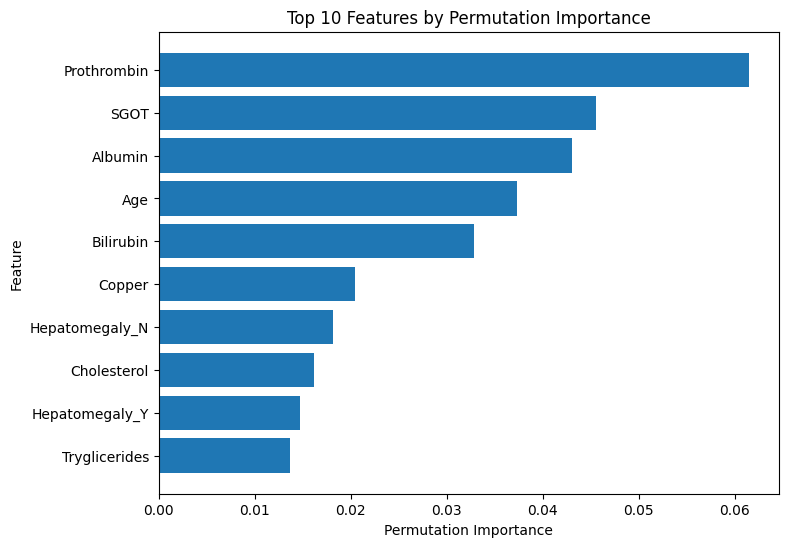

In [160]:
#Extract and visualize the top 10 features using permutation importance
from sklearn.inspection import permutation_importance
from matplotlib import pyplot as plt
import numpy as np

# Calculate permutation importance
perm_importance = permutation_importance(rf, X_test, y_test, n_repeats=10, random_state=42)

# Get feature importances and their corresponding feature names
importances = perm_importance.importances_mean
features = X_test.columns

# Sort features by importance
sorted_idx = np.argsort(importances)[-10:]  # Get indices of top 10 features

# Visualize the top 10 features
plt.figure(figsize=(8, 6))
plt.barh(features[sorted_idx], importances[sorted_idx])
plt.xlabel('Permutation Importance')
plt.ylabel('Feature')
plt.title('Top 10 Features by Permutation Importance')
plt.show()


### **In a Markdown cell, comment on how these features compare to the model from Part 1. Are there any new features in the top 10?**

All top 10 features after PCA are principal components, which are new compared to the original named features. This indicates that the feature engineering and PCA effectively transformed the dataset into a new feature space.

The redistribution of importance suggests that PCA captured the variance in fewer dimensions, making the model potentially more robust and less overfitted.



The transformation and feature engineering have introduced new features (principal components) in the top 10 most important features, indicating a successful dimensionality reduction. However, this comes at the cost of reduced interpretability. The principal components capture the variance more efficiently, which can improve the model's performance and generalizability.
